In [30]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from numpy import array
from sklearn.utils import shuffle


# 데이터 로드
url = 'https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/abalone.csv'
data = pd.read_csv(url)

# # 시계열 데이터를 만들기 위해 Rings를 기준으로 오름차순 정렬
# # Rings가 동일한 데이터일 경우 가장 Rings에 대해 영향이 큰 Shell_weight를 기준으로 재정렬
# data = data.sort_values(by=['Rings', 'Shell_weight'], ascending=[True, True])

# 'Rings' 데이터를 3개 범주로 나누기
bins = [0, 8, 12, np.inf]  # 8 미만, 8-10, 10 초과
labels = ['young', 'medium', 'old']
data['Age_category'] = pd.cut(data['Rings'], bins=bins, labels=labels)

# 원-핫 인코딩 적용
encoder = OneHotEncoder(sparse=False)
age_categories = data[['Age_category']]
age_encoded = encoder.fit_transform(age_categories)

# 특성 데이터 준비
features = data.drop(['Rings', 'Sex', 'Age_category'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


# # 시퀀스 길이 정의
# n_steps = 3

# # 데이터를 시퀀스 형태로 변환하는 함수
# def split_sequences(sequences, n_steps):
#     X, y = [], []
#     for i in range(len(sequences) - n_steps + 1):
#         # find the end of this pattern
#         end_ix = i + n_steps
#         # gather input and output parts of the pattern
#         seq_x, seq_y = sequences[i:end_ix, :-y_encoded.shape[1]], sequences[end_ix-1, -y_encoded.shape[1]:]
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)

# # 전체 데이터를 X, y 데이터셋으로 변환
# sequences = np.hstack((X_scaled, y_encoded))  # 특성 데이터와 타겟을 하나의 배열로 결합
# X, y = split_sequences(sequences, n_steps)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, age_encoded, test_size=0.2, random_state=42)

# 성능 평가를 위한 데이터셋 섞음
X_test, y_test = shuffle(X_test, y_test, random_state=48)




C:\Users\Hyeon\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# X_train과 X_test의 차원을 변경
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))



# # 모델 구성
# model = Sequential([
#     LSTM(50, input_shape=(1, X_train.shape[1]), return_sequences=True),
#     Dropout(0.2),
#     LSTM(25),
#     Dropout(0.2),
#     Dense(3, activation='softm# X_train과 X_test의 차원을 변경

# ])

# 모델 구성
model = Sequential([
    Bidirectional(LSTM(100, return_sequences=True), input_shape=(1, X_train.shape[2])),  # 양방향 LSTM 레이어
    Dropout(0.2),
    Bidirectional(LSTM(50)),  # 추가 양방향 LSTM 레이어
    Dropout(0.1),
    Dense(3, activation='softmax')  # 출력 레이어: 3개의 범주
])



# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10)

# 모델 훈련
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])



Epoch 1/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6258 - loss: 0.9426 - val_accuracy: 0.6682 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 2/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6636 - loss: 0.7639 - val_accuracy: 0.6906 - val_loss: 0.7014 - learning_rate: 0.0010
Epoch 3/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7123 - loss: 0.6772 - val_accuracy: 0.7100 - val_loss: 0.6723 - learning_rate: 0.0010
Epoch 4/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 0.6973 - val_accuracy: 0.7130 - val_loss: 0.6551 - learning_rate: 0.0010
Epoch 5/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7159 - loss: 0.6532 - val_accuracy: 0.7100 - val_loss: 0.6602 - learning_rate: 0.0010
Epoch 6/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7108 - loss: 0.6533 - val_accuracy: 0.7220 - val_loss: 0.6448 - learning_rate: 0.0010
Epoch 7/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7169 - loss: 0.6434 - val_acc

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7251 - loss: 0.6143 - val_accuracy: 0.7280 - val_loss: 0.6248 - learning_rate: 0.0010
Epoch 46/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7322 - loss: 0.6197 - val_accuracy: 0.7250 - val_loss: 0.6387 - learning_rate: 0.0010
Epoch 47/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7320 - loss: 0.5944 - val_accuracy: 0.7220 - val_loss: 0.6269 - learning_rate: 0.0010
Epoch 48/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7247 - loss: 0.6258 - val_accuracy: 0.7220 - val_loss: 0.6215 - learning_rate: 0.0010
Epoch 49/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7277 - loss: 0.5973 - val_accuracy: 0.7280 - val_loss: 0.6305 - learning_rate: 0.0010
Epoch 50/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7299 - loss: 0.6051 - val_accuracy: 0.7220 - val_loss: 0.6276 - learning_rate: 0.0010
Epoch 51/200
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7217 - loss: 0.6226 - val_accuracy:

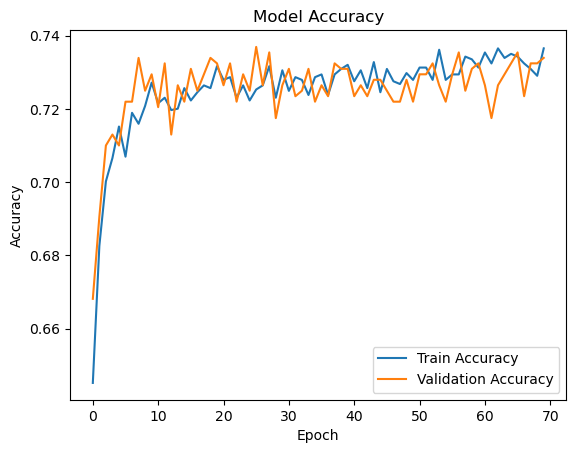

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.7180 - loss: 0.6083
Test Accuracy: 0.7093


In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 모델 성능 평가 (정확도 계산)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")